In [1]:
import cv2
import numpy as np
import scipy.io
import scipy.optimize
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import pandas
#import magni
import math
from PIL import Image
#import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

<a id='visualize'></a>
## OpenCV edge detection

Tutorial of Canny edge detection adapted from OpenCV [tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html#canny)

* Canny edge detection is an algorithmic method of finding edges in image data:
    1. Use a convolution method to remove noise. In this case we apply a 5x5 guassian filter
    2. Use a convolution method to find edge gradients and angles. That is, weight the discrete sum of the image with another discrete function, the spatial mask. In this case, the Sobel operator is the spatial mask. OpenCV rounds this angle as one of four directions; the gradient is always perpendicular to the edge direction
    3. Use non-maximum suppression to turn pixel values to zero if they don't exist at a local maximum in its neighborhood in the direction of the gradient. An effective method of thinning the edge
    4. Perform hysteresis thresholding. Rather than instatiating a cut off for gradients values, pixels greater than a max value are binned as edges, pixels less than a min value are binned as not edges, and anything between is classified as an edge it is connected to max value binned edges. 

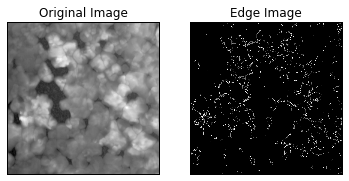

In [3]:
img = cv2.imread('height.jpg',0)

#Python: cv.Canny(image, edges, threshold1, threshold2, aperture_size=3) → None
edges = cv2.Canny(img,0,17,3)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Widget Usage for GUI-type thing
- Describe how it works in the code

- Appeals of using:
      - Pretty easy to implement
      - Looks clean (unlike the some of the other alternatives)
      - Can have multiple widgets on same function
      - Many different types of widgets

- Drawbacks: 
      - Can't figure out to stop the continuous calculation
      
      - Other than that, that's the only one we have found.

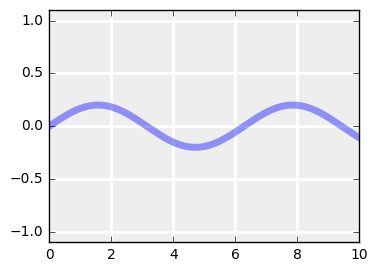

In [3]:
from ipywidgets import interact, FloatSlider, RadioButtons

amplitude_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.2)

color_buttons = RadioButtons(options=['blue', 'green', 'red'])


@interact(amplitude=amplitude_slider, color=color_buttons)

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
    ax.grid(color='w',linewidth=2,linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x,amplitude*np.sin(x),color=color,lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)

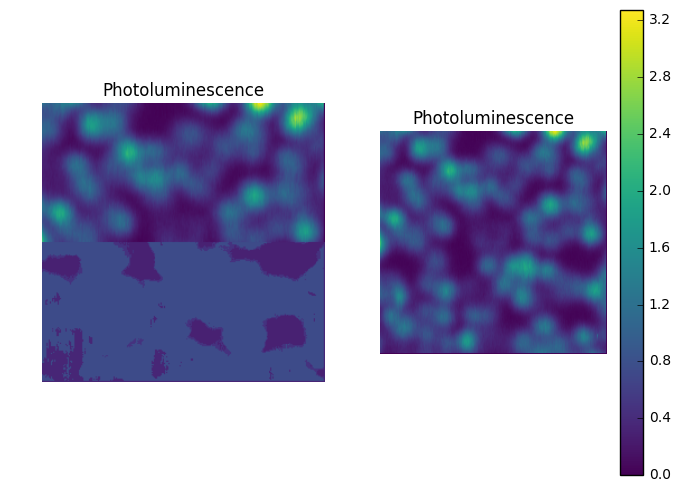

In [6]:
from ipywidgets import interact, FloatSlider, RadioButtons, IntSlider
%matplotlib inline


def myround(x, base):
    return (float(base) * round(float(x)/float(base)))
params={'lines.markersize' : 3,'axes.labelsize': 10,'font.size': 10,'legend.fontsize': 10,'xtick.labelsize': 10,'ytick.labelsize': 10,'text.usetex': False,}
plt.rcParams.update(params)
Ht2 = np.loadtxt('./data/MABr.1.Ht.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('./data/MABr.1.Po.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('./data/MABr.1.Ph.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('./data/MABr.1.Am.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('./data/MABr.1.Pl.txt',skiprows=0, dtype=np.float64)
# flatten the images
Ht2_flat = Ht2.flatten()
Po2_flat = Po2.flatten()
Ph2_flat = Ph2.flatten()
Am2_flat = Am2.flatten()
Pl2_flat = Pl2.flatten()
plt.show()
X = [Ht2_flat, Po2_flat, Ph2_flat, Am2_flat]
X = np.array(X).T
Y = np.array(Pl2_flat).T
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])



depth_slider = IntSlider(min=1, max=20, step=1, value=2)

@interact(Depth=depth_slider,continuous_update=False)

def plot(Depth):#,Xtrain,Xtest,Ytrain,Ytest,Ht2):
    clf = DecisionTreeRegressor(max_depth=Depth)
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)

    x = Ht2.shape[0]
    y = Ht2.shape[1]
    k=0
    merge = np.concatenate((Ytrain,Ypred))
    Pl_predict = np.zeros((x,y))
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j] = merge[k]
            k = k + 1
        
    fig = plt.figure(figsize=(8,6))
    pl_ax = fig.add_subplot(121)
    pl_ax.imshow(Pl_predict, cmap='viridis')
    pl_ax.set_title('Photoluminescence')
    pl_ax.axis('off')
    pl_ax = fig.add_subplot(122)
    cax = pl_ax.imshow(Pl2, cmap='viridis')
    pl_ax.set_title('Photoluminescence')
    pl_ax.axis('off')

    fig.colorbar(cax)